# 溢出网络

In [38]:
import pandas as pd

import networkx as nx
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'Songti SC'  # 设置字体为SimHei
plt.rcParams['axes.unicode_minus'] = False  # 解决负号“-”显示异常

from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('svg') 

def plot_spillover_network(df, title):
    """
    根据给定的 8 个市场溢出方阵绘制网络图。

    参数:
    df (pd.DataFrame): 8x8 的市场溢出方阵，其中对角线值代表市场自身溢出，其余值代表市场间溢出。

    返回:
    无，绘制网络图。
    """
    plt.subplots(figsize=(6.5,6.5))
    # 创建一个有向图
    G = nx.DiGraph()

    # 添加节点，并设置节点大小为市场自身溢出量（即对角线值）
    for i in range(len(df)):
        G.add_node(df.columns[i], size=df.iloc[i, i])

    # 添加边，并根据净溢出值设置边的宽度和箭头大小
    for i in range(len(df)):
        for j in range(len(df)):
            if i != j and df.iloc[i, j] > 0:  # 如果存在市场 j 到市场 i 的溢出值
                G.add_edge(df.columns[j], df.columns[i], weight=df.iloc[i, j])

    # 获取节点大小列表，并进行适当的缩放
    sizes = [G.nodes[node]['size']*4000  for node in G.nodes]  # 缩放因子100，可根据需要调整
    
    # 获取边的宽度列表，并进行适当的缩放
    weights = [G[u][v]['weight'] for u, v in G.edges]
    max_weight = max(weights) if weights else 1  # 避免出现无边时的除零错误
    edge_widths = [8* (weight / max_weight) for weight in weights]  # 将边宽缩放到适当大小

    # 根据节点大小动态调整边框粗细，使用比例缩放控制外框粗细
    node_border_widths = [size * 0.003 for size in sizes]  # 外框粗细与节点大小成比例

    # 定义图的布局
    pos = nx.circular_layout(G)  # 采用环形布局

    # 绘制节点
    nx.draw_networkx_nodes(G, pos, node_size=sizes, node_color='skyblue',
                           linewidths=node_border_widths,
                           alpha=0.7, edgecolors='black')

    # 绘制节点标签
    nx.draw_networkx_labels(G, pos, font_size=14, font_weight='bold')

    # 调整箭头和圆圈之间的距离
    connection_style = 'arc3,rad=0.1'  # 弧度连接样式，值可以调整以改变箭头与节点的距离, 可选0.2

    # 绘制边，并根据溢出值调整边的粗细和箭头大小
    nx.draw_networkx_edges(
        G, pos, edgelist=G.edges, width=edge_widths, edge_color='gray',
        arrowstyle='-|>', arrowsize=20, connectionstyle=connection_style,
        min_source_margin=10,
        min_target_margin=10  # 目标节点的最小距离，控制箭头的位置
    )



    plt.subplots_adjust(bottom=0.2)  # 增加底部空间以适应标题
    plt.title(title.split('：')[-1], loc='center', pad=20)
    plt.axis('off')
    #plt.show()
    plt.tight_layout()
    plt.savefig('images/%s.svg' %title)
    return sizes

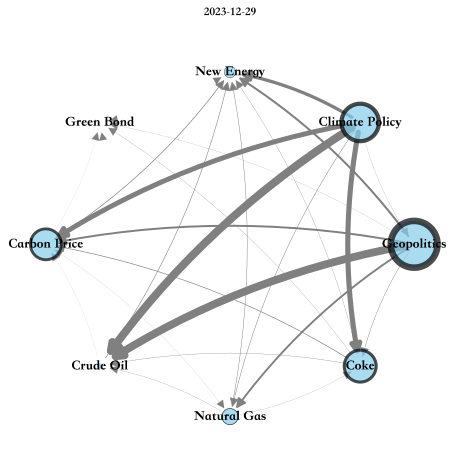

In [44]:
date='2023-12-29'
path = 'datasets/俄乌冲突：%s.csv' %date
spillover = pd.read_csv(path, index_col=0)
sizes = plot_spillover_network(spillover, path.split('/')[-1].split('.')[0])